# Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

## Q1. Downloading the data
We'll use the same [NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?
- [ ] 16
- [ ] 17
- [ ] 18
- [x] 19

In [22]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
train_df = pd.read_parquet('../data/yellow_tripdata_2021-01.parquet')

train_df.columns.size

19

## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?
- [ ] 32.59
- [ ] 42.59
- [ ] 52.59
- [x] 62.59

<Axes: >

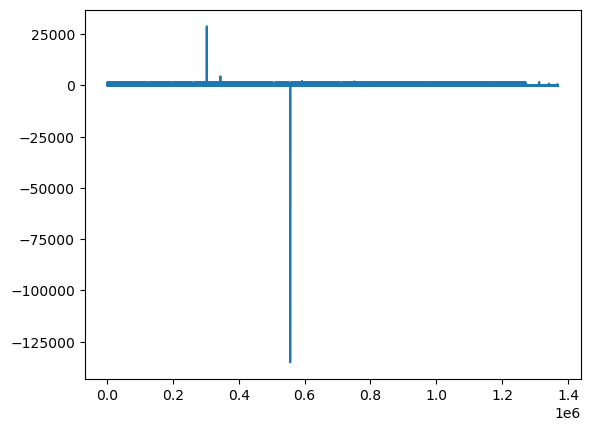

In [3]:
train_df['duration'] = train_df['tpep_dropoff_datetime'] - train_df['tpep_pickup_datetime']
train_df['duration'] = train_df['duration'].apply(lambda td: td.total_seconds()/60)
train_df.duration.plot()

In [4]:
train_df = train_df[train_df.duration > 1]
train_df.duration.std()

62.81257674392328

In [5]:
len1 = train_df.shape[0]

## Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?
- [ ] 90%
- [ ] 92%
- [ ] 95%
- [x] 98%

<Axes: >

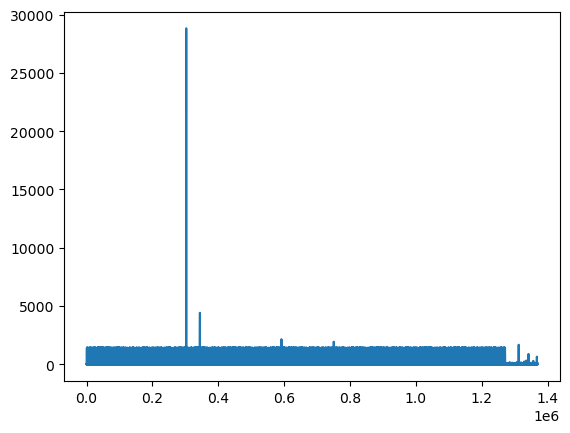

In [6]:
train_df.duration.plot()

<Axes: >

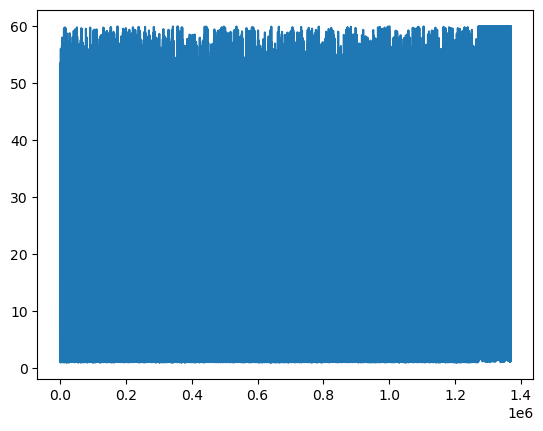

In [7]:
train_df = train_df[(train_df.duration < 60)]
train_df.duration.plot()

In [8]:
len2 = train_df.shape[0]
len2

1342851

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?
- [ ] 2
- [ ] 155
- [ ] 345
- [x] 515
- [ ] 715

In [9]:
categorical = ['PULocationID', 'DOLocationID']
train_df[categorical] = train_df[categorical].astype(str)

In [10]:
# train_df['PU_DO'] = train_df['PULocationID'] + '_' + train_df['DOLocationID']

train_dict = train_df[categorical].to_dict(orient='records')

In [11]:
dv = DictVectorizer()

train_x = dv.fit_transform(train_dict)

In [12]:
train_x.shape

(1342851, 518)

## Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters, where duration is the response variable
- Calculate the RMSE of the model on the training data

What's the RMSE on train?
- [ ] 3.64
- [x] 7.64
- [ ] 11.64
- [ ] 16.64

In [13]:
train_y = train_df['duration'].values

In [14]:
lr = LinearRegression()

lr.fit(train_x, train_y)

LinearRegression()

In [15]:
pred_y = lr.predict(train_x)

root_mean_squared_error(pred_y, train_y)

6.836755839433657

In [16]:
def read_data(filename:str):
    df = pd.read_parquet(filename)
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = df['duration'].apply(lambda td: td.total_seconds()/60)
    df = df[(df.duration > 1) &(df.duration < 60)]
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

## Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

- [ ] 3.81
- [x] 7.81
- [ ] 11.81
- [ ] 16.81

In [17]:
train_df = read_data('../data/yellow_tripdata_2021-01.parquet')
val_df = read_data('../data/yellow_tripdata_2021-02.parquet')

In [18]:
dv = DictVectorizer()

train_dict = train_df[categorical].to_dict(orient='records')
train_x = dv.fit_transform(train_dict)

val_dict = val_df[categorical].to_dict(orient='records')
val_x = dv.transform(val_dict)

In [19]:
train_y = train_df['duration'].values
val_y = val_df['duration'].values

In [20]:
lr = LinearRegression()

lr.fit(train_x, train_y)

pred_y = lr.predict(val_x)

In [21]:
root_mean_squared_error(val_y, pred_y)

7.414650108445854